In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
import sklearn.metrics as metrics

from mpl_toolkits.mplot3d import Axes3D




In [3]:
iris  =pd.read_csv('Iris.csv')

In [4]:
print(iris .head())
print('Data shape -->', iris .shape)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Data shape --> (150, 6)


In [5]:
iris["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

data preprocessing

In [6]:
data = iris.drop(['Species'], axis=1)
y = iris['Species']

In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

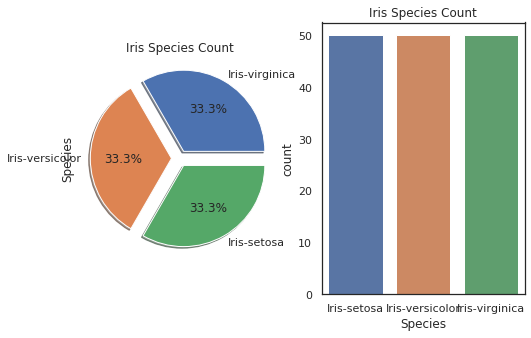

In [8]:
f,ax=plt.subplots(1,2,figsize=(8,5))
iris['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Iris Species Count')
sns.countplot('Species',data=iris,ax=ax[1])
ax[1].set_title('Iris Species Count')
plt.show()

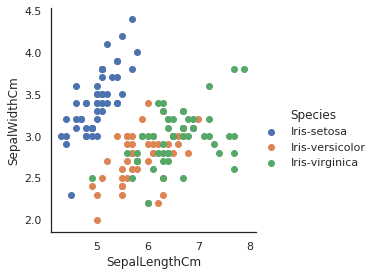

In [9]:
sns.FacetGrid(iris, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();

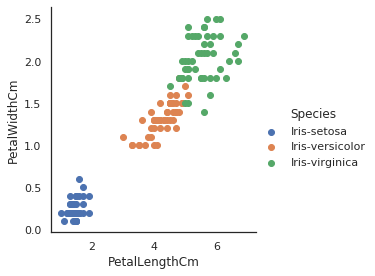

In [10]:
sns.FacetGrid(iris, hue="Species", size=4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

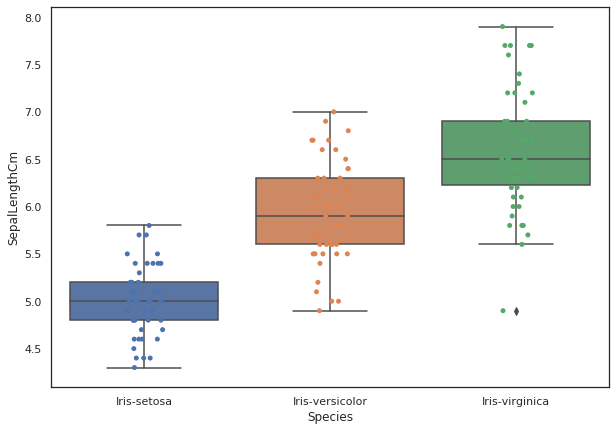

In [11]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Species',y='SepalLengthCm',data=iris)
fig=sns.stripplot(x='Species',y='SepalLengthCm',data=iris,jitter=True,edgecolor='gray')

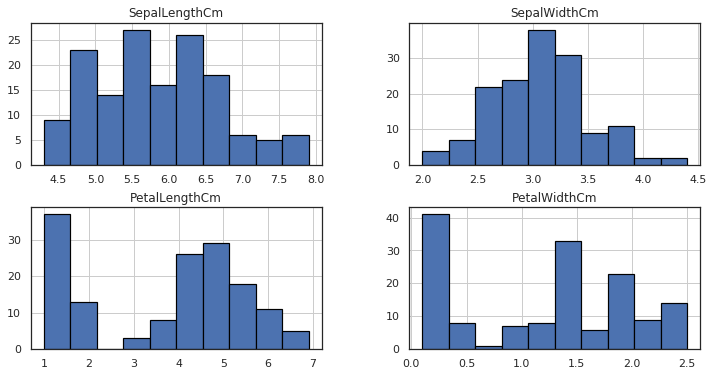

In [12]:
tmp = iris.drop('Id', axis=1)
tmp.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

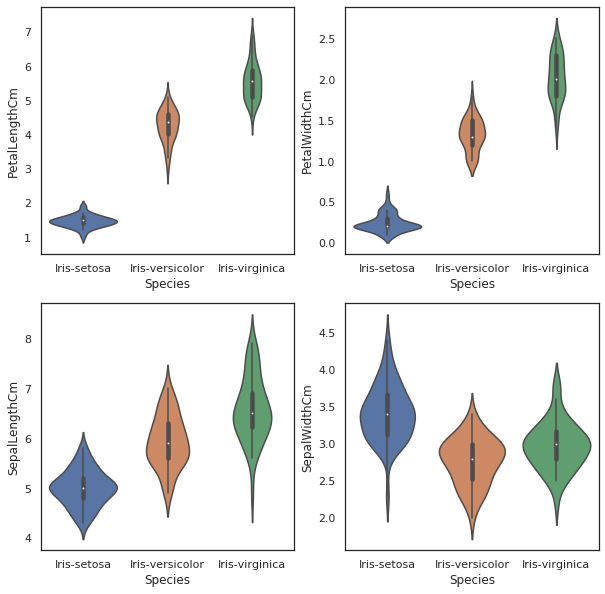

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

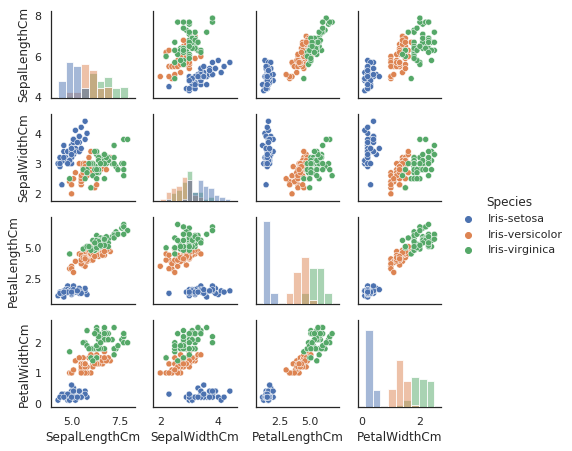

In [14]:
sns.pairplot(tmp, hue="Species", diag_kind="hist", size=1.6);

converting species to numericals

In [15]:
def y_label (invalue):
    if invalue == 'Iris-setosa' :
        return 1
    elif invalue == 'Iris-virginica' :
        return 0
    else :
        return 2
df1 = pd.DataFrame(data=y.values, columns=['species'])

df1['index']=df1['species'].apply(y_label)

data preparation

In [19]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [20]:
std_scale = StandardScaler().fit(data)
data_scaled = std_scale.transform(data)

X_scaled = pd.DataFrame(data_scaled, columns = data.columns)

X_scaled.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
33,-0.958423,-0.416010,2.651878,-1.341272,-1.312977
65,-0.219398,1.038005,0.106445,0.364699,0.264699
136,1.420313,0.553333,0.800654,1.047087,1.579429
57,-0.404154,-1.143017,-1.513375,-0.260824,-0.261193
54,-0.473438,0.795669,-0.587764,0.478430,0.396172


K-Means algorithm

In [21]:
def plot_kmeans_scale(k) :
  
    kmeans_model = KMeans(n_clusters=k, random_state=123)
    kmeans_model.fit(data_scaled)
    #Make predictions
    labels=kmeans_model.predict(data_scaled)
    #to get centroids
    centroid=kmeans_model.cluster_centers_
    colors=['r','g','p','b','o','y','m','w']
    fig = plt.figure(1, figsize=(3,3))
    kx = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=120)
    for i in range(k) :
        points=np.array([data_scaled[j]for j in range(len(data_scaled))if labels[j]>=i])
        kx.scatter(points[:, 3], points[:, 0], points[:, 2],s=5, cmap='jet')#colors[i]) 
        kx.scatter(centroid[:,0],centroid[:,1],marker='*',s=200,c='red')
      
        #plt.title('Number of clusters = {}'.format(k))
        plt.show()

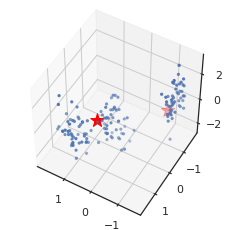

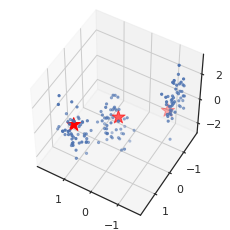

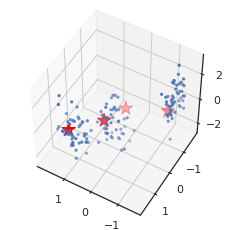

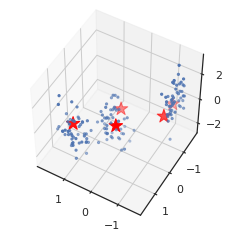

In [22]:
k=5
for i in range(k+1):
    if  i>1 :
        plot_kmeans_scale(i)

finding optimal number of clusters

Text(3.1, 5001, 'optimal number of clusters = 3')

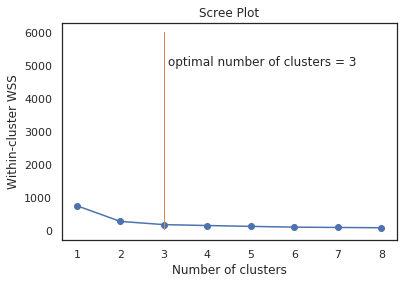

In [23]:
k=9
WSS = []
for k in range(1,9):
        kmeans_model = KMeans(n_clusters=k, random_state=123)
        kmeans_model.fit(data_scaled)
        WSS.append(kmeans_model.inertia_)
plt.plot(range(1,9), WSS, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster WSS")
plt.title("Scree Plot")
plt.plot([3]*6000, range(1,6001), ",")
plt.text(3.1, 5001, "optimal number of clusters = 3")

In [24]:
for i in range(2,8):
    labels=KMeans(n_clusters=i,random_state=123).fit(data_scaled).labels_
    print ("Silhoutte score for k= "+str(i)+" is "+str(metrics.silhouette_score(data_scaled,labels,metric="euclidean",random_state=123)))

Silhoutte score for k= 2 is 0.570815210603504
Silhoutte score for k= 3 is 0.452949780355554
Silhoutte score for k= 4 is 0.3911646146569221
Silhoutte score for k= 5 is 0.3290872528629286
Silhoutte score for k= 6 is 0.3275372800058476
Silhoutte score for k= 7 is 0.3317386351955721


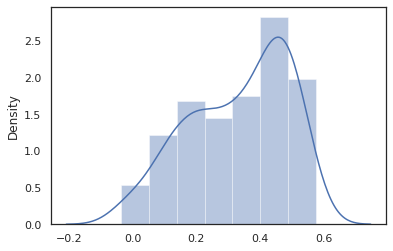

In [25]:
scores = metrics.silhouette_samples(data_scaled, labels)
sns.distplot(scores);

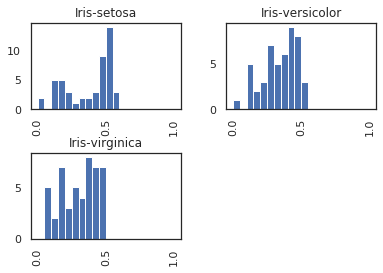

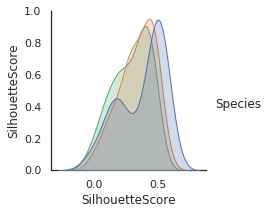

In [26]:
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Species'] = iris['Species']
df_scores.hist(by='Species', column='SilhouetteScore', range=(0,1.0), bins=20);
sns.pairplot(df_scores, hue="Species", size=3);

K-means clustering with 3 optimal Clusters

In [27]:
km = KMeans(n_clusters=3, random_state=123)
km.fit(data_scaled)
print('inertia with clusters=3 -->' ,km.inertia_)
km.cluster_centers_

inertia with clusters=3 --> 177.05608895062974


array([[ 1.14317894,  1.03542672, -0.07079946,  1.04224753,  1.09269889],
       [-1.1547262 , -1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 0.07560189,  0.03894137, -0.73184462,  0.30676007,  0.21508647]])

In [28]:
predicted_cluster = km.predict(data_scaled)
predicted_labels = km.labels_

Text(0.5, 0.92, 'K Means')

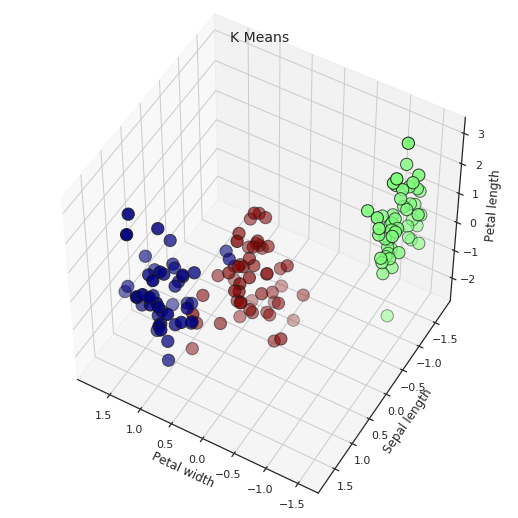

In [29]:
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=120)
ax.scatter(data_scaled[:, 3], data_scaled[:, 0], data_scaled[:, 2],
          c=predicted_labels.astype(np.float), cmap='jet',edgecolor="k", s=150)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means", fontsize=14)

Comparing Clustered data with original data for defining boundaries of 3 clusters(k-means)

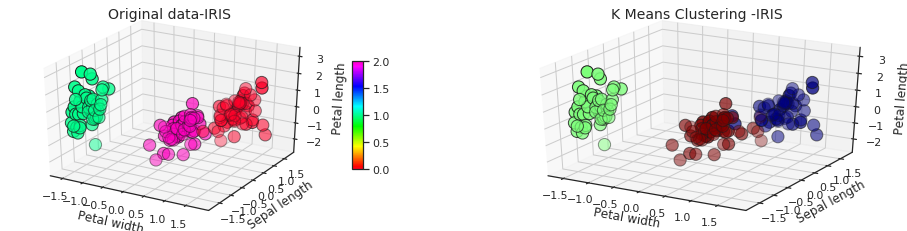

In [30]:
from matplotlib import cm

fig = plt.figure(figsize=plt.figaspect(0.25))
ax = fig.add_subplot(1, 2, 1, projection='3d')

surf =ax.scatter(data_scaled[:, 3], data_scaled[:, 0],data_scaled[:, 2],
          c=df1['index'],  cmap='gist_rainbow',edgecolor="k", s=150)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")

plt.title("Original data-IRIS", fontsize=14)

fig.colorbar(surf, shrink=0.5, aspect=10)

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.scatter(data_scaled[:, 3], data_scaled[:, 0], data_scaled[:, 2],
           c=predicted_labels.astype(np.float), cmap='jet',edgecolor='k', s=150)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means Clustering -IRIS", fontsize=14)
plt.show()

Observations
In conclusion, from Silhouette score and Scree plot, we can be clustered to 3 main groups of species :

we can infer that the sepal sizes are more mixed, so the clustering algorithm cant vary much difference between two species i.e versicolor and virginica species. And also note that the species are nearly linearly separable with petal size, we can compare this range of values with the original data (which is not scaled)

Create cluster profiles compare with Original Data labels

In [31]:
def predict_species (invalue):
    if invalue == 1:
        return 'Iris-setosa' 
    elif invalue == 0 :
        return 'Iris-virginica'
    else :
        return 'Iris-versicolor'
df1['predict_label']= pd.DataFrame(data=predicted_labels, columns=['predict_label'])

df1['predict_species']=df1['predict_label'].apply(predict_species)

In [32]:
sum(np.where((df1['species']!=df1['predict_species']),1,0))

7

In [33]:
df1[df1['species']!=df1['predict_species']]

,species,index,predict_label,predict_species
77,Iris-versicolor,2,0,Iris-virginica
86,Iris-versicolor,2,0,Iris-virginica
101,Iris-virginica,0,2,Iris-versicolor
106,Iris-virginica,0,2,Iris-versicolor
113,Iris-virginica,0,2,Iris-versicolor
119,Iris-virginica,0,2,Iris-versicolor
121,Iris-virginica,0,2,Iris-versicolor


By K-means clustering with number of clusters=3 , we are able to cluster 143 species correctly out of 150 species